# Hoja de Trabajo 1
**Modelación y Simulación**

Realizado por:
- Javier Alejandro Azurdia Arrecis | 21242
- Diego Alejandro Morales Escobar | 21146
- Ángel Sebastian Castellanos | 21700

# Ejercicio 01

# Revisar presentacion para mora

1. **¿Qué es un modelo?**
   Un modelo es una representación simplificada de un sistema real que captura sus principales características y comportamientos. Se utiliza para analizar, comprender y predecir el comportamiento del sistema bajo diferentes condiciones. Los modelos pueden ser matemáticos, físicos, conceptuales o computacionales, y ayudan a los investigadores y profesionales a experimentar y evaluar diversas hipótesis y escenarios sin necesidad de interactuar directamente con el sistema real.

2. **¿Qué es simulación?**
   La simulación es una técnica que utiliza modelos para replicar y estudiar el comportamiento de un sistema real o imaginado a lo largo del tiempo. A través de la simulación, se pueden experimentar diferentes condiciones y escenarios, observando sus efectos sin riesgos o costos asociados con experimentos reales. Las simulaciones se utilizan en diversas áreas, como la ingeniería, la economía, la medicina y las ciencias sociales, para tomar decisiones informadas y optimizar procesos.

3. **¿Qué es un algoritmo heurístico?**
   Un algoritmo heurístico es un método de resolución de problemas que emplea una estrategia práctica y no óptima para encontrar una solución suficientemente buena en un tiempo razonable. Estos algoritmos son especialmente útiles para problemas complejos donde las soluciones exactas son difíciles de obtener. Las heurísticas se basan en reglas empíricas, intuiciones o enfoques simplificados que ayudan a reducir el espacio de búsqueda y a encontrar soluciones viables rápidamente, aunque no garantizan siempre la solución óptima.

4. **Defina los pasos de algoritmos genéticos**
   
   Los algoritmos genéticos siguen una serie de pasos que imitan los procesos evolutivos naturales:
    1. Conocer la población (Definir n población)
    2. Calcular fitness
    3. Realizar el cross over
    4. Mutar
    5. Evaluar fitness
    6. Elegir los mas aptos
    7. Re definir la nueva población con los más aptos
    8. Regresar al paso 3. 
    9. Evaluar las condiciones de terminación
            Pueden ser, pero no están limitadas a esto:
        1. t iteraciones
        2. porcentaje de la población con un fitness arriba de x valor
        3. Que haya un individuo o un conjunto de individuos con ciertas características. 
    10. Presentar resultados

# Ejercicio 02

Mediante el uso de algoritmos genéticos, resuelva el siguiente ejercicio.
Implemente un algoritmo genético en Python para encontrar el valor máximo de la función
dentro del intervalo [0, 1]

𝑓(𝑥) = 𝑥 * 𝑠𝑖𝑛(10π𝑥) + 1

Para ello considere los siguientes pasos:
1. Definir el problema: implemente la función objetivo
2. Inicializar la población: genere una población inicial de individuos con valores aleatorios dentro de los
límites dados.
3. Evaluar aptitud: Cree una función para evaluar la aptitud de cada individuo en función de la función objetivo.
4. Selección: Implemente un mecanismo de selección para elegir a los padres de la población en función de
su aptitud.
5. Crossover: Diseñe un método cruzado para producir descendencia combinando partes de dos padres.
6. Mutación: implemente una función de mutación para introducir cambios aleatorios en algunos de los
descendientes.
7. Reemplazo: Forme una nueva población reemplazando algunos individuos antiguos por otros nuevos
generados por cruce y mutación.
8. Iteración a través de generaciones: Ejecute el bucle del algoritmo genético durante un número específico de
generaciones, realizando selección, cruce, mutación y reemplazo en cada generación.
9. Seguimiento: Realice un seguimiento del mejor individuo encontrado y su estado físico a lo largo de las
generaciones. Genere la mejor solución y su idoneidad al final de la ejecución.
10. Visualización: Trace la evolución de la mejor aptitud a lo largo de las generaciones para visualizar el
proceso de optimización

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return x * np.sin(10 * np.pi * x) + 1


In [76]:
lim_inf = 0
lim_sup = 1
poblacion_inicial = 100
poblacion = np.random.uniform(lim_inf, lim_sup, poblacion_inicial)


In [77]:
def evaluar_aptitud(poblacion):
    df = pd.DataFrame(poblacion, columns=['x'])
    df['f(x)'] = f(df['x'])
    return df


In [78]:
def seleccion(df, num_seleccionados):
    df = df.sort_values('f(x)', ascending=False)
    return df.head(num_seleccionados)


In [79]:
def cruce(padres, num_hijos):
    hijos = []
    for _ in range(num_hijos):
        padre1 = padres.sample()
        padre2 = padres.sample()
        hijo = (padre1['x'].values[0] + padre2['x'].values[0]) / 2
        hijos.append(hijo)
    return hijos


In [80]:
def mutacion(hijos, prob_mut, lim_inf, lim_sup):
    for i in range(len(hijos)):
        if np.random.rand() < prob_mut:
            hijos[i] = np.random.uniform(lim_inf, lim_sup)
    return hijos


In [81]:
def reemplazo(poblacion, hijos):
    poblacion = poblacion['x'].values
    poblacion = np.append(poblacion, hijos)
    return poblacion


In [82]:
ciclos = 1000
num_seleccionados = 66
num_hijos = 33
prob_mut = 0.05

mejor_aptitud = []
mejor_individuo = []

for _ in range(ciclos):
    df = evaluar_aptitud(poblacion)
    mejor_aptitud.append(df['f(x)'].max())
    mejor_individuo.append(df[df['f(x)'] == df['f(x)'].max()]['x'].values[0])
    
    padres = seleccion(df, num_seleccionados)
    hijos = cruce(padres, num_hijos)
    hijos = mutacion(hijos, prob_mut, lim_inf, lim_sup)
    poblacion = reemplazo(padres, hijos)


Mejor individuo: 0.8511897930877822
Mejor aptitud: 1.8505952429626031


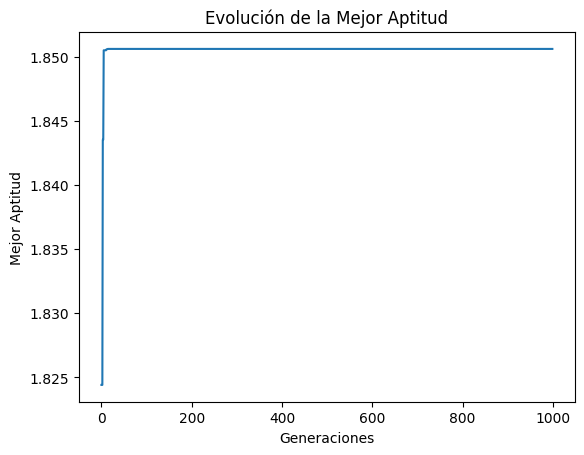

In [83]:
print(f"Mejor individuo: {mejor_individuo[-1]}")
print(f"Mejor aptitud: {mejor_aptitud[-1]}")

plt.plot(mejor_aptitud)
plt.xlabel('Generaciones')
plt.ylabel('Mejor Aptitud')
plt.title('Evolución de la Mejor Aptitud')
plt.show()


Se encontró que el mejor individuo (valor en x) era 0.85 con un valor de aptitud (valor máximo en y) de **1.85**. Estos resultados fueron revisados y respaldados por la gráfica de la función original, la cual también arroja los mismo resultados. Se adjunta la gráfica:

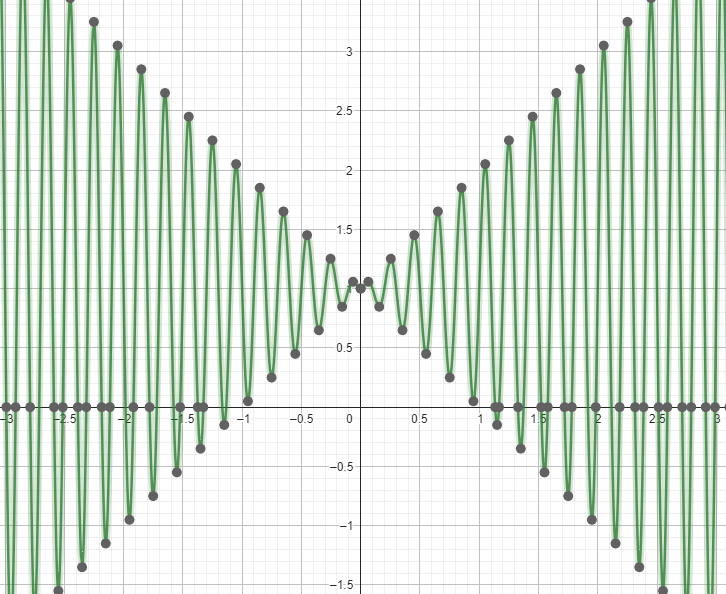

Para poder llegar a la resolución de este problema mediante código, se implementó una idea general sobre lo que se deseaba hacer paso a paso mediante la ayuda del equipo completo, así mismo cuando esto ya estaba definido, se le paso el siguiente prompt a chatGPT:
```ciclos = 100
for i in range(ciclos):
    # Evaluar aptitud
    df = pd.DataFrame(poblacion, columns=['x'])
    df['f(x)'] = f(df['x'])

    # Selección: seleccionar los mejores 66 individuos
    df = df.sort_values('f(x)', ascending=False)
    df = df.head(66)

    # cruce: cruzar los mejores 66 individuos para producir 33 hijos
    hijos = []
    for i in range(33):
        padre1 = df.sample()
        padre2 = df.sample()
        hijo = (padre1 + padre2) / 2
        hijos.append(hijo.values[0])

    # mutación: mutar los 33 hijos. Considerar una probabilidad de mutación del 5%
    for i in range(33):
        if np.random.rand() < prob_mut:
            hijos[i] = np.random.uniform(lim_inf, lim_sup)

    # reemplazo: reemplazar los 33 peores individuos de la población por los 33 hijos
    poblacion = df['x'].values
    poblacion = np.append(poblacion, hijos)
    poblacion

# Ejercicio 02

Mediante el uso de algoritmos genéticos, resuelva el siguiente ejercicio.
Implemente un algoritmo genético en Python para encontrar el valor máximo de la función
dentro del intervalo [0, 1]

𝑓(𝑥) = 𝑥 * 𝑠𝑖𝑛(10π𝑥) + 1

Para así obtener la solución final.



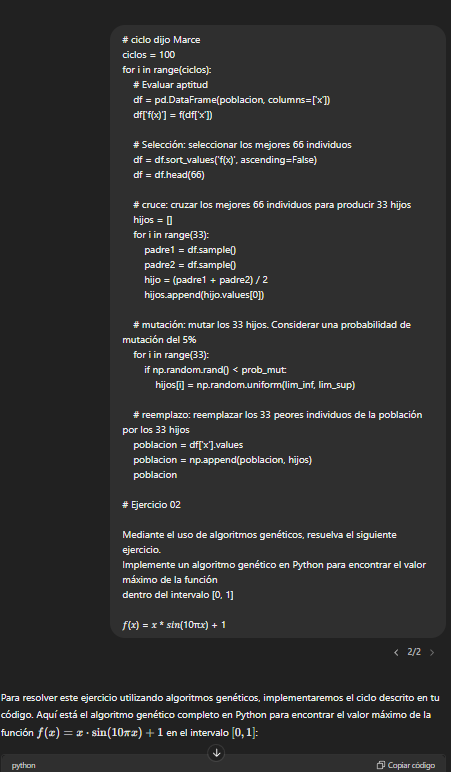

# Ejercicio 03

### Investigue sobre los algoritmos genéticos paralelos. Escriba un breve texto de no más de dos párrafos sobre estos. Asegúrese de definir adecuadamente en qué partes se puede paralelizar este tipo de algoritmos y por qué en otros pasos no funciona. Además de señalar adecuadamente porque sí o no se puede usar pipelining.

Los algoritmos genéticos paralelos son una variante de los algoritmos genéticos que aprovechan el paralelismo para mejorar la eficiencia y la calidad de búsqueda. En un AGP, se trabajan simultáneamente con múltiples poblaciones semi-independientes para resolver un mismo problema.

El paralelismo se puede aplicar en varias partes del proceso:

- **Evaluación de la función de fitness**: Cada población puede evaluar individuos en paralelo, lo que acelera la convergencia.
- **Selección y cruzamiento**: Se pueden realizar en paralelo para generar nuevas soluciones.
- **Mutación y reemplazo**: Estas operaciones también pueden ser paralelizadas.

Sin embargo, no todos los pasos son adecuados para el paralelismo. Además, el pipelining (donde se ejecutan etapas en serie) no es siempre aplicable debido a las dependencias entre operaciones.

Obtenido de: 
- https://www.fing.edu.uy/~sergion/gp/documentos/propios/EDCAGP.pdf
- https://docta.ucm.es/rest/api/core/bitstreams/9be14441-652a-41d4-8b1c-7109a64f73d4/content